Let's look at some data that we might want to classify. Imagine you've got some data from a course about test scores, project scores, and whether the student passed or failed the course.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Example data.
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']


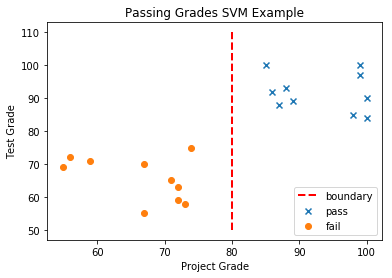

In [3]:
def setup_plot():
    plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
    plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

    # We'll eyeball a pass / fail line to split the points.
    plt.plot([80, 80], [50, 110], 'r--', lw=2)

    plt.xlabel('Project Grade')
    plt.ylabel('Test Grade')

setup_plot()
plt.legend(['boundary', 'pass', 'fail'], loc=4)
plt.title('Passing Grades SVM Example')
plt.show()

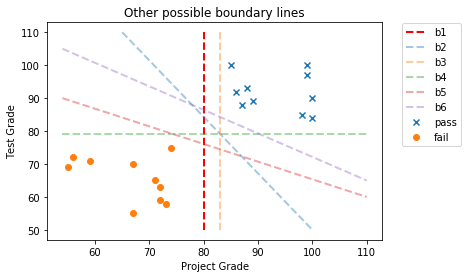

In [13]:
# Add some new boundary lines.
setup_plot()
plt.plot([65, 100], [110, 50], '--', lw=2, alpha=0.4)
plt.plot([83, 83], [110, 50], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [79, 79], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [90, 60], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [105, 65], '--', lw=2, alpha=0.4)
plt.legend(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'pass', 'fail'],
            bbox_to_anchor=(0.25, 0.02, 1, 1))
plt.title('Other possible boundary lines')
plt.show()

# Margin and Support Vectors
You probably have an intuition that a boundary line passing close to data points is bad because it'll be susceptable to noise and be worse at predicting new data points than a boundary line farther away. In SVM we formalize that intuition by defining the margin as the distance between the nearest point of each class and the boundary.

Finding the margin for our initial red boundary line is easy. The nearest point for each class is at (85,100) and (74,75). These nearest points are the support vectors that our model is named after. The distance from our support vectors to the red boundary line is just the horizontal distance (because our boundary happens to be vertical). The margin is 5 from the pass support vector and 6 from the fail support vector.

Is that the best we can do? No. Several of the other boundary lines are worse, like the orange boundary line b3, but looking at the light blue boundary line b2 above you can probably see without having to do the math that the margin is larger so it's a better boundary than our initial red boundary. The goal of SVM is find the best boundary, or the boundary that optimizes the margin.

In [4]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = test_data[['test', 'project']]
Y = test_data['pass']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

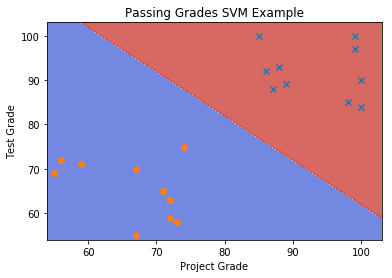

In [15]:
# Visualize our model
y_min, y_max = X.test.min() - 1, X.test.max() + 3
x_min, x_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades SVM Example')
plt.show()

# 3.4.2

          x         y      d
0 -0.665211 -0.439370  False
1 -0.477054 -0.065911  False
2 -0.207291  0.059821   True
3 -0.956106 -0.120174  False
4  0.178467  0.342788   True


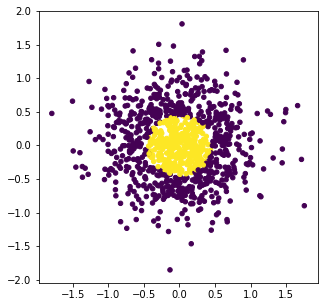

In [5]:
data = pd.DataFrame()
data['x'] = np.random.normal(0, .5, 1000)
data['y'] = np.random.normal(0, .5, 1000)

# Create your circle of indicators
data['d'] = data.x**2 + (data.y)**2 < .2
print(data.head())
plt.figure(figsize=(5,5))
plt.scatter(data['x'], data['y'], c=data['d'], s= 20)
plt.show()

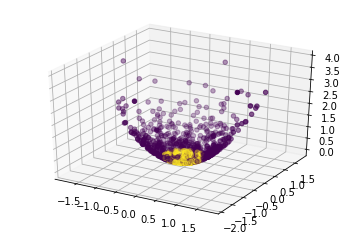

In [8]:
# We're doing some 3D plotting now. 
# Tinker with it if you like but python is generally not great at this kind of thing...

from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)

# Why does it give error ... copied from curriculum..

AttributeError: 'float' object has no attribute 'ndim'

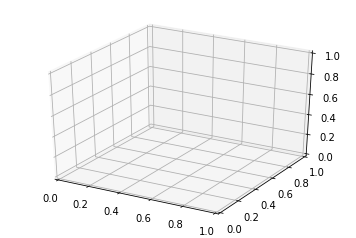

In [9]:

from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(range(-5, 5, 1), range(-5, 5, 1))
ax.plot_surface(xx, yy, .2, color='k', alpha=.5)
ax.hold(True)
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)


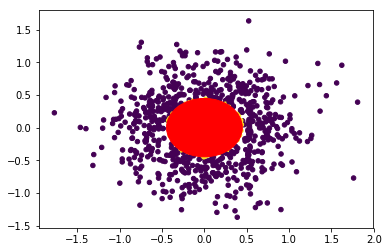

In [27]:
circle1 = plt.Circle((0, 0), np.sqrt(.2), color='r')

fig, ax = plt.subplots()

ax.scatter(data['x'], data['y'], c=data['d'], s= 20)
ax.add_artist(circle1)